# 1. Build your own convolutional neural network using pytorch

In [ ]:
!pip install torch torchvision

import os
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision.datasets import ImageFolder
import csv
import cv2
import matplotlib.pyplot as plt
import pandas as pd

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)


In [ ]:
!unzip /content/Dog_heart.zip -d /content/data/
!unzip /content/Test.zip -d /content/data/

Archive:  /content/Dog_heart.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/Dog_heart.zip or
        /content/Dog_heart.zip.zip, and cannot find /content/Dog_heart.zip.ZIP, period.
Archive:  /content/Test.zip
   creating: /content/data/Test/
  inflating: /content/data/Test/100.png  
  inflating: /content/data/Test/1621.png  
 extracting: /content/data/Test/1622.png  
 extracting: /content/data/Test/1623.png  
  inflating: /content/data/Test/1624.png  
  inflating: /content/data/Test/1625.png  
  inflating: /content/data/Test/1626.png  
  inflating: /content/data/Test/1627.png  
  inflating: /content/data/Test/1628.png  
  inflating: /content/data/Test/1629.png  
  inflating: /content/data/Test/1630.png  
  inflating: /con

In [ ]:
# define the neural network architecture
class CNN(nn.Module):
    def __init__(self, num_classes=3):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(128),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(256),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(512)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(512 * 4 * 4, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# instantiate the model and move it to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN(num_classes=3).to(device)
print("Model Architecture:", model)

# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

Model Architecture: EnhancedCNN(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(

# 2. Train your model using dog heart dataset (you may need to use  Google Colab (or Kaggle) with GPU to train your code)

### (1) use torchvision.datasets.ImageFolder for the training dataset
### (2) use custom dataloader for test dataset (return image tensor and file name)

In [ ]:
# define the data transformation
transform = transforms.Compose([
    transforms.Resize((75,75)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dir = '/content/data/Dog_heart/Train'
valid_dir = '/content/data/Dog_heart/Valid'
test_dir = '/content/data/Test'

# load the training and validation dataset using ImageFolder
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
valid_dataset = datasets.ImageFolder(root=valid_dir, transform=transform)

# define custom dataset class for the test data
class TestDataset(Dataset):
    def __init__(self,directory,transform=None):
        self.directory = directory
        self.transform = transform
        self.image_files = os.listdir(directory)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.directory, self.image_files[idx])
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, self.image_files[idx]

test_dataset = TestDataset(directory=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradient
        optimizer.zero_grad()
        # forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        # backward pass
        loss.backward()
        optimizer.step()
        # accumulate the loss over the batch
        running_loss += loss.item()

    # compute the average loss
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}")

    # Validate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"validation Accuracy after Epoch {epoch+1}: {accuracy}%")

Epoch 1/20, Loss: 0.3128279522061348
validation Accuracy after Epoch 1: 69.5%
Epoch 2/20, Loss: 0.267995040694421
validation Accuracy after Epoch 2: 69.0%
Epoch 3/20, Loss: 0.26957690495659004
validation Accuracy after Epoch 3: 67.0%
Epoch 4/20, Loss: 0.2185618392276493
validation Accuracy after Epoch 4: 63.0%
Epoch 5/20, Loss: 0.23861204900524832
validation Accuracy after Epoch 5: 64.0%
Epoch 6/20, Loss: 0.20207317740741101
validation Accuracy after Epoch 6: 63.5%
Epoch 7/20, Loss: 0.27918144704943354
validation Accuracy after Epoch 7: 69.5%
Epoch 8/20, Loss: 0.2135024428028952
validation Accuracy after Epoch 8: 64.5%
Epoch 9/20, Loss: 0.19241773819720204
validation Accuracy after Epoch 9: 66.0%
Epoch 10/20, Loss: 0.12056980523365465
validation Accuracy after Epoch 10: 69.0%
Epoch 11/20, Loss: 0.1240670398216356
validation Accuracy after Epoch 11: 71.0%
Epoch 12/20, Loss: 0.12901735619049182
validation Accuracy after Epoch 12: 71.0%
Epoch 13/20, Loss: 0.11297714926133101
validation Ac

In [ ]:
# using the test dataset to predict and save the result
model.eval()
predictions = []
with torch.no_grad():
    for inputs, file_names in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(zip(file_names, predicted.cpu().numpy()))

with open('predictions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for file_name, prediction in predictions:
        writer.writerow([file_name, prediction])

print("test result saved to predictions.csv")

# 3. Evaluate your model using the developed software

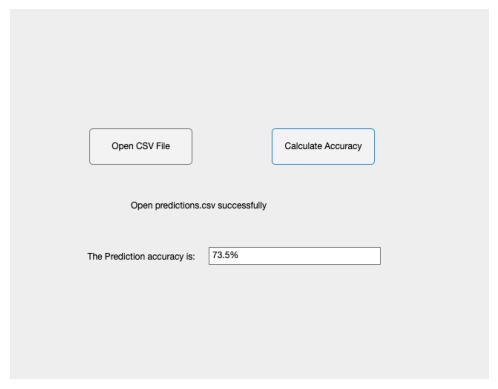

In [ ]:
result_dir = '/content/predictions.png'
result_img = cv2.imread(result_dir)
result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
plt.imshow(result_img)
plt.axis('off')
plt.show()

In [ ]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model_final.pt')

# 4. Compare results with [RVT paper](https://www.nature.com/articles/s41598-023-50063-x). Requirement: performance is better than VGG16: 70%

The result is 73.5% better than VGG16 70%.

# 5. Write a four-page paper report using the shared LaTex template. Upload your paper to ResearchGate or Arxiv, and put your paper link and GitHub weight link here.

[ResearchGate: CNN-Based Classification of Dog Heart X-Ray](https://www.researchgate.net/publication/382112048_CNN-Based_Classification_of_Dog_Heart_X-Ray)

[GitHub: qdou14/DL](https://github.com/qdou14/DL)